# Exploratary Data Analysis for Toxic Comment Classification Dataset

## Dataset Description
Dataset from one past Kaggle Competition: Toxic Comment Classification Challenge
The competition was about fighting negative online behaviours by building a multi-headed model that is able to detect different types of toxicity scores such as “threats, obscenity, insults, and identity-based hate.” 

There are large number of Wikipedia comments which have been labeled by human raters for toxic behavior. 
The types of toxicity are:

- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

Reference: 
*   Title: Stop the S@#$ - Toxic Comments EDA
*    Author: Jagan
*    Date: 2018
*    Code version: 21
*    Availability: https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda
-------------------------------------------------------------------------------------------------------------------
*   Title: EDA : Toxic Comment Classification Challenge
*    Author: Matthieu Clin
*    Date: 2018
*    Code version: 1
*    Availability: https://www.kaggle.com/clinma/eda-toxic-comment-classification-challenge

In [0]:
#!pip install Pillow

In [1]:
#import required packages
import pandas as pd 
import numpy as np
import gc
import time
import warnings
from scipy import sparse
import scipy.stats as ss

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [3]:
train.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [4]:
# number of rows in training and test sets
nrow_train=train.shape[0]
nrow_test=test.shape[0]
print('There are ' + str(nrow_train) + ' rows in the training dataset')
print('There are ' + str(nrow_test) + ' rows in the test set')

There are 159571 rows in the training dataset
There are 153164 rows in the test set


In [5]:
# check if there are missing labels
missing_label_train = train.isnull().sum()
missing_label_test = train.isnull().sum()
print('For training set:')
print(missing_label_train)
print('---------------------------')
print('For test set: ')
print(missing_label_test)

For training set:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
---------------------------
For test set: 
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


We can see that there is no missing labels for both training and test sets

In [6]:
#!/Users/matianran/anaconda/bin/python -m pip install wordcloud
#!pip install matplotlib==3.1.0
#!pip install matplotlib-venn

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn3

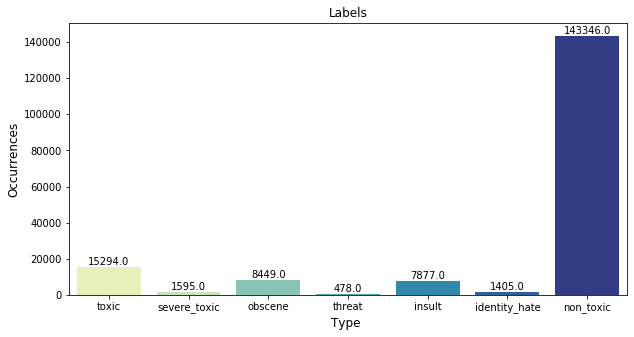

In [44]:
#marking comments without any toxix labels as "non_toxic"
rowsums=train.iloc[:,2:].sum(axis=1)
train['non_toxic']=(rowsums==0)
train['non_toxic'].sum()

x=train.iloc[:,2:].sum()
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

We obeserved that there is an imbalance in the dataset. Let's try drop the non-toxic column and view the distribution of labels more clearly

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


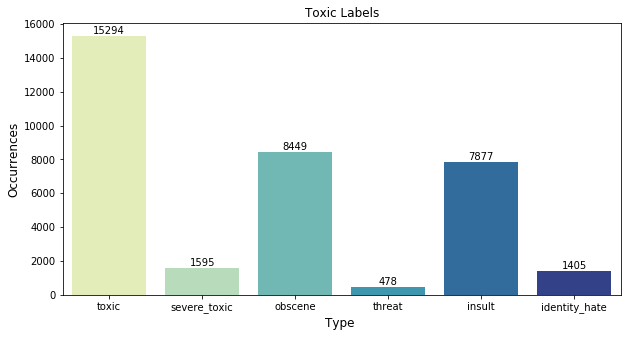

In [28]:
x=train.drop('non_toxic',axis=1).iloc[:,2:].sum()
print(x)
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Toxic Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

As the sum of all labels > number of rows, entries are not uniquely labeled with one toxicity. 
For example, one comment can be labelled with both insult and obscene

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64


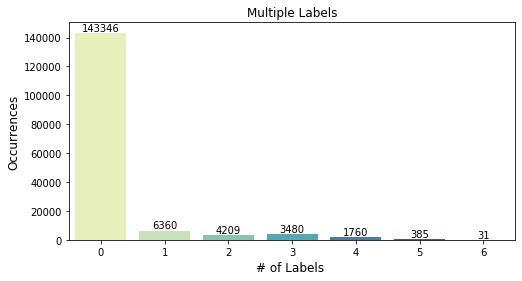

In [26]:
#compute the sum of labels
# 0: non_toxic
# 1: only one label for that particular entries
# >1: labeled with multiple labels 
x=rowsums.value_counts()
print(x)
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Multiple Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

1    6360
3    4209
2    3480
4    1760
5     385
6      31
dtype: int64


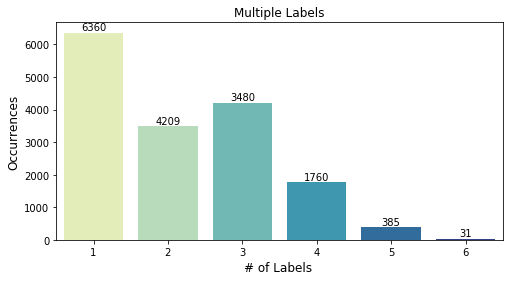

In [25]:
#drop non_toxic comments
x=rowsums.value_counts()
x = x.drop(0)
print(x)
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Multiple Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
com_combi = train.groupby(cols)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
com_combi.head(n=10)

toxic  severe_toxic  obscene  threat  insult  identity_hate   count
0      0             0        0       0       0              0  143346
1      1             0        0       0       0              0    5666
2      1             0        1       0       1              0    3800
3      1             0        1       0       0              0    1758
4      1             0        0       0       1              0    1215
5      1             1        1       0       1              0     989
6      1             0        1       0       1              1     618
7      0             0        1       0       0              0     317
8      0             0        0       0       1              0     301
9      1             1        1       0       1              1     265

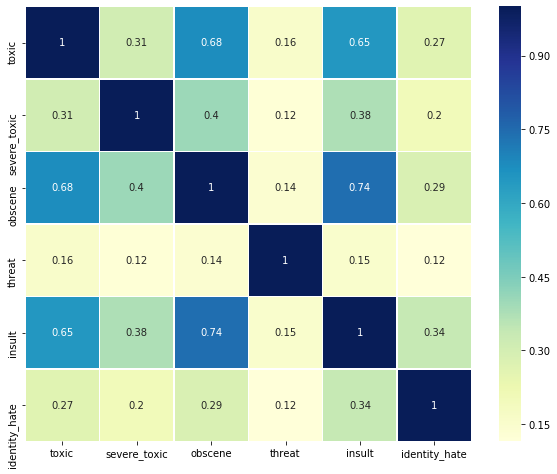

In [21]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(train.iloc[:,2:-1].corr(),annot=True,linewidths=.5,cmap="YlGnBu")
#ax.set_aspect("equal")

### Here are some interesting findings from common combination and the correlation heatmap:
- toxic has high correlation with obscene and insult
- obscene and insult has high correlation
- threat has relatively low correlation with the rest of other labels
- toxic and severe_toxic does not have high correlation. This may show that many of those labeled one, did not labeled with the other

### Now let's look into the venn diagrams for some of the common combinations

5978
332
322
1390
1972
201
5954


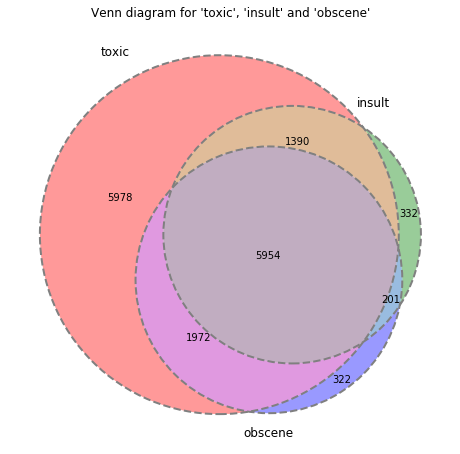

In [23]:
from matplotlib_venn import venn2, venn2_circles,venn3, venn3_circles
t = train[(train['toxic'] == 1) & (train['insult'] == 0) & (train['obscene'] == 0)].shape[0]
print(t)
i = train[(train['toxic'] == 0) & (train['insult'] == 1) & (train['obscene'] == 0)].shape[0]
print(i)
o = train[(train['toxic'] == 0) & (train['insult'] == 0) & (train['obscene'] == 1)].shape[0]
print(o)

t_i = train[(train['toxic'] == 1) & (train['insult'] == 1) & (train['obscene'] == 0)].shape[0]
print(t_i)
t_o = train[(train['toxic'] == 1) & (train['insult'] == 0) & (train['obscene'] == 1)].shape[0]
print(t_o)
i_o = train[(train['toxic'] == 0) & (train['insult'] == 1) & (train['obscene'] == 1)].shape[0]
print(i_o)

t_i_o = train[(train['toxic'] == 1) & (train['insult'] == 1) & (train['obscene'] == 1)].shape[0]
print(t_i_o)

# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
v = venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), set_labels=('toxic', 'insult', 'obscene'))
c = venn3_circles(subsets = (t, i, t_i, o, t_o, i_o, t_i_o),linestyle='dashed', linewidth=2, color="gray")
plt.show()

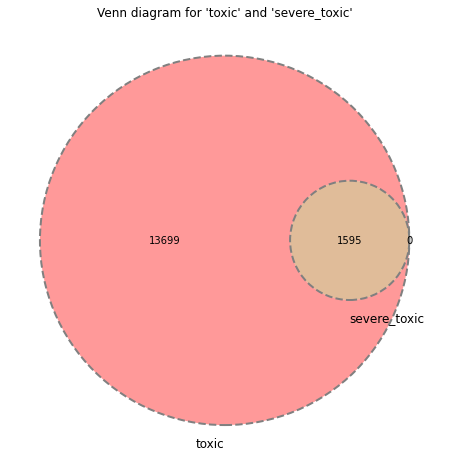

In [19]:
t = train[(train['toxic'] == 1) & (train['severe_toxic'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['severe_toxic'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
v = venn2(subsets = (t, s, t_s), set_labels=('toxic', 'severe_toxic'))
c = venn2_circles(subsets = (t, s, t_s),linestyle='dashed', linewidth=2, color="gray")
plt.show()

We can observe that severe_toxic is a subgroup of toxic group. 

## WordClouds

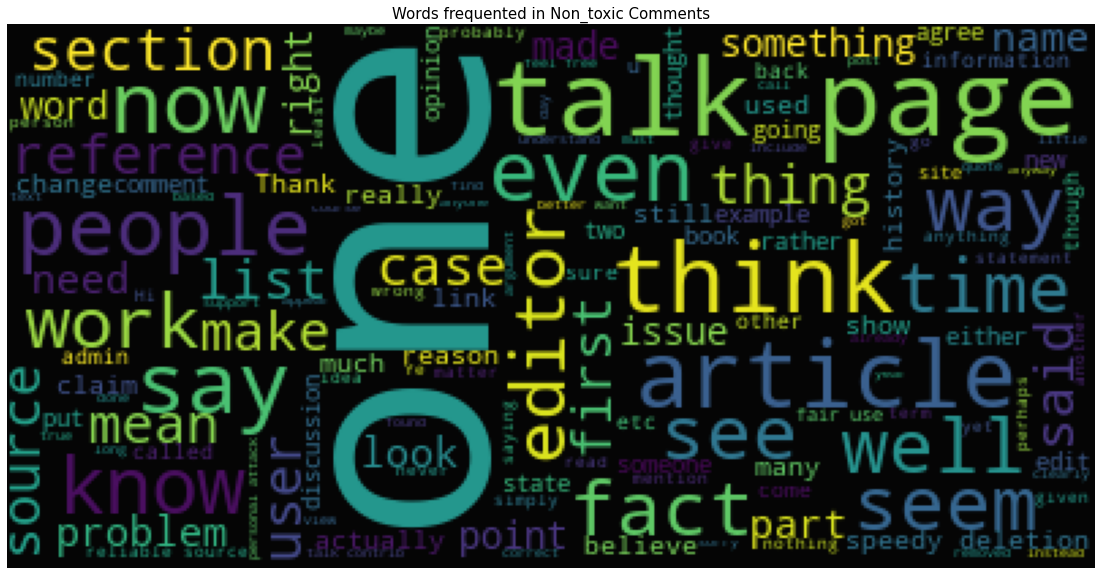

In [20]:
stopword=set(STOPWORDS)
#for non_toxic comments
subset=train[train.non_toxic==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non_toxic Comments", fontsize=15)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

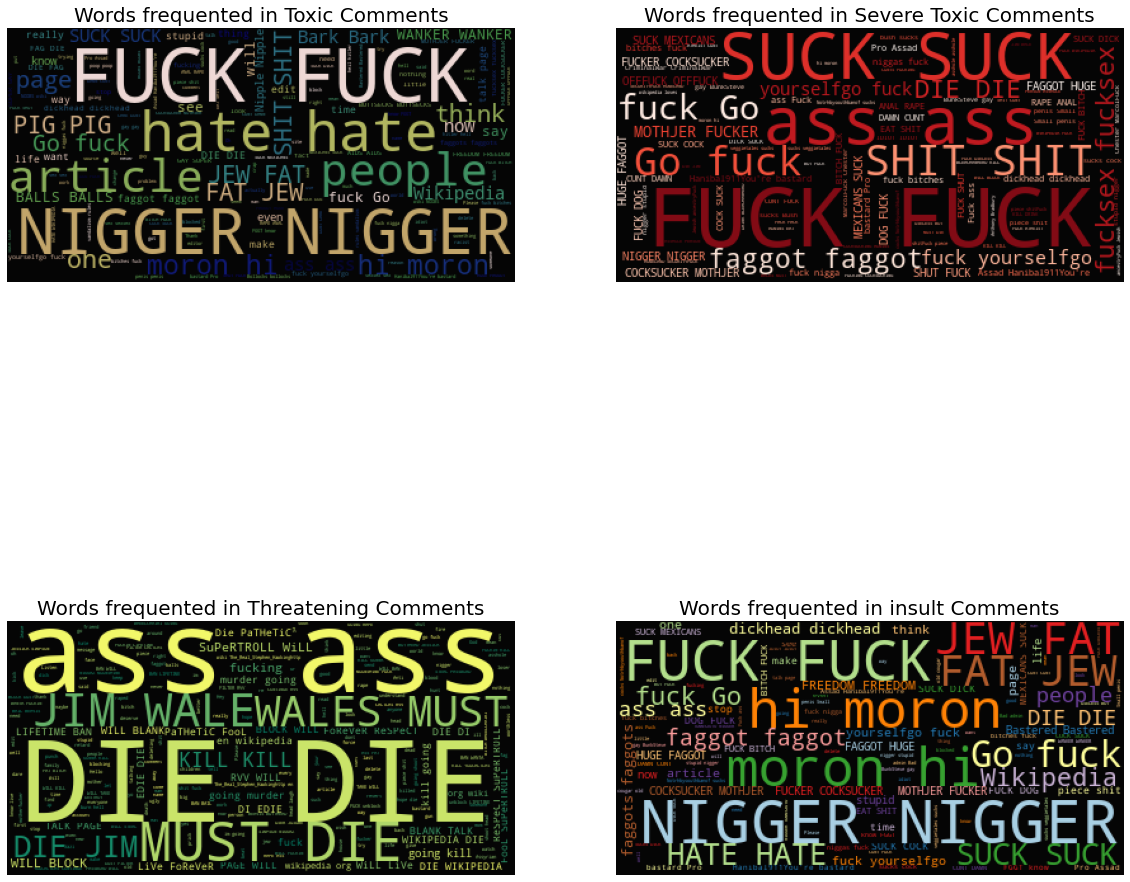

In [21]:
#wordcloud for toxic comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=244), alpha=0.98)

#insult
plt.subplot(224)
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()

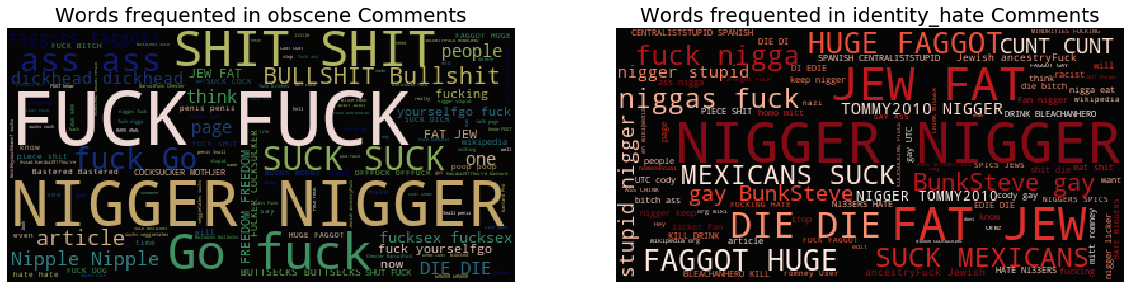

In [43]:
subset=train[train.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.axis("off")
plt.title("Words frequented in obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(122)
subset=train[train.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in identity_hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

### **Adding Bigram Analysis**

Creating Bigrams

In [101]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords

In [0]:
stop_words = set(stopwords.words('english'))


In [0]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [0]:
import string
def clean_doc(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
  clean_tokens = [word for word in tokens if len(word) > 1]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(w) for w in clean_tokens]
  fin_sen = ' '.join(tokens)
  return fin_sen

In [0]:
from textblob import TextBlob

In [0]:
def getSubjectivity(Comment):
  blob = TextBlob(Comment)
  sub = blob.sentiment
  return sub.subjectivity


def getPolarity(Comment):
  blob = TextBlob(Comment)
  sub = blob.sentiment
  return sub.polarity

  

In [0]:
train['cleaned_text'] = train['comment_text'].apply(clean_doc)
train['Subjectivity'] = train['cleaned_text'].apply(getSubjectivity)
train['Polarity'] = train['cleaned_text'].apply(getPolarity)


In [0]:
toxic_subset=train[train.toxic==1]
severe_toxic_subset=train[train.severe_toxic==1]
obscene_subset=train[train.obscene==1]
threat_subset=train[train.threat==1]
insult_subset=train[train.insult==1]
identity_hate_subset=train[train.identity_hate==1]
non_toxic_subset=train[train.non_toxic==True]

In [216]:
print('##toxic_subset##')
print(toxic_subset['Subjectivity'].mean())
print(toxic_subset['Polarity'].mean())
print('##severe_toxic_subset##')
print(severe_toxic_subset['Subjectivity'].mean())
print(severe_toxic_subset['Polarity'].mean())
print('##obscene_subset##')
print(obscene_subset['Subjectivity'].mean())
print(obscene_subset['Polarity'].mean())
print('##threat_subset##')
print(threat_subset['Subjectivity'].mean())
print(threat_subset['Polarity'].mean())
print('##insult_subset##')
print(insult_subset['Subjectivity'].mean())
print(insult_subset['Polarity'].mean())
print('##identity_hate_subset##')
print(identity_hate_subset['Subjectivity'].mean())
print(identity_hate_subset['Polarity'].mean())
print('##non_toxic_subset##')
print(non_toxic_subset['Subjectivity'].mean())
print(non_toxic_subset['Polarity'].mean())

##toxic_subset##
0.48525107759614866
-0.12451810949824996
##severe_toxic_subset##
0.5371253559996623
-0.23593385773186168
##obscene_subset##
0.5061014934071446
-0.15947600655137625
##threat_subset##
0.47218820630856806
-0.16189813257056454
##insult_subset##
0.5133190457514084
-0.17524275690910882
##identity_hate_subset##
0.48836447400016314
-0.10008404186761555
##non_toxic_subset##
0.3782076191508232
0.08642643926558505


In [107]:
non_toxic_subset

id  ...                                       cleaned_text
0       0000997932d777bf  ...  Explanation Why edits made username Hardcore M...
1       000103f0d9cfb60f  ...  Daww He match background colour Im seemingly s...
2       000113f07ec002fd  ...  Hey man Im really trying edit war Its guy cons...
3       0001b41b1c6bb37e  ...  More cant make real suggestion improvement won...
4       0001d958c54c6e35  ...        You sir hero Any chance remember page thats
...                  ...  ...                                                ...
159566  ffe987279560d7ff  ...  And second time asking view completely contrad...
159567  ffea4adeee384e90  ...      You ashamed That horrible thing put talk page
159568  ffee36eab5c267c9  ...  Spitzer Umm there actual article prostitution ...
159569  fff125370e4aaaf3  ...  And look like actually put speedy first versio...
159570  fff46fc426af1f9a  ...  And really dont think understand came idea bad...

[143346 rows x 11 columns]

In [80]:
non_toxic_subset.head(1)

id  ... non_toxic
0  0000997932d777bf  ...      True

[1 rows x 9 columns]

In [0]:
toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in toxic_subset.cleaned_text]
severe_toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in severe_toxic_subset.cleaned_text]
obscene_terms_bigram = [list(bigrams(list(comment.split()))) for comment in obscene_subset.cleaned_text]
threat_terms_bigram = [list(bigrams(list(comment.split()))) for comment in threat_subset.cleaned_text]
insult_terms_bigram = [list(bigrams(list(comment.split()))) for comment in insult_subset.cleaned_text]
identity_hate_terms_bigram = [list(bigrams(list(comment.split()))) for comment in identity_hate_subset.cleaned_text]
non_toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in non_toxic_subset.cleaned_text]

Identifying the counts for co-occurences (biagrams)

In [0]:
import itertools
import collections

In [0]:
toxic_bigrams = list(itertools.chain(*toxic_terms_bigram))
severe_toxic_bigrams = list(itertools.chain(*severe_toxic_terms_bigram))
obscene_bigrams = list(itertools.chain(*obscene_terms_bigram))
threat_bigrams = list(itertools.chain(*threat_terms_bigram))
insult_bigrams = list(itertools.chain(*insult_terms_bigram))
identity_hate_bigrams = list(itertools.chain(*identity_hate_terms_bigram))
non_toxic_bigrams = list(itertools.chain(*non_toxic_terms_bigram))

In [0]:
# Create counter of words in clean bigrams
toxic_bigram_counts = collections.Counter(toxic_bigrams)
severe_toxic_bigram_counts = collections.Counter(severe_toxic_bigrams)
obscene_bigram_counts = collections.Counter(obscene_bigrams)
threat_bigram_counts = collections.Counter(threat_bigrams)
insult_bigram_counts = collections.Counter(insult_bigrams)
identity_hate_bigram_counts = collections.Counter(identity_hate_bigrams)
non_toxic_bigram_counts = collections.Counter(non_toxic_bigrams)

In [0]:
top_toxic_bigrams = toxic_bigram_counts.most_common(50)
top_severe_toxic_bigrams =severe_toxic_bigram_counts.most_common(50) 
top_obscene_bigrams = obscene_bigram_counts.most_common(50)
top_threat_bigrams=threat_bigram_counts.most_common(50)
top_insult_bigrams=insult_bigram_counts.most_common(50)
top_identity_hate_bigrams=identity_hate_bigram_counts.most_common(50)
top_non_toxic_bigrams = non_toxic_bigram_counts.most_common(50) 

In [0]:
def toConvert(tup, di): 
    di = dict(tup) 
    return di 

In [0]:
toxic_dict = {}
severe_toxic_dict = {}
obscene_dict = {}
threat_dict = {}
insult_dict = {}
identity_hate_dict = {}
non_toxic_dict = {}
toxic_plot = toConvert(top_toxic_bigrams, toxic_dict) 
severe_toxic_plot = toConvert(top_severe_toxic_bigrams, severe_toxic_dict)
obscene_plot = toConvert(top_obscene_bigrams, obscene_dict)
threat_plot = toConvert(top_threat_bigrams, threat_dict)
insult_plot = toConvert(top_insult_bigrams, insult_dict)
identity_hate_plot = toConvert(top_identity_hate_bigrams, identity_hate_dict)
non_toxic_plot = toConvert(top_non_toxic_bigrams, non_toxic_dict) 

In [0]:
import networkx as nx

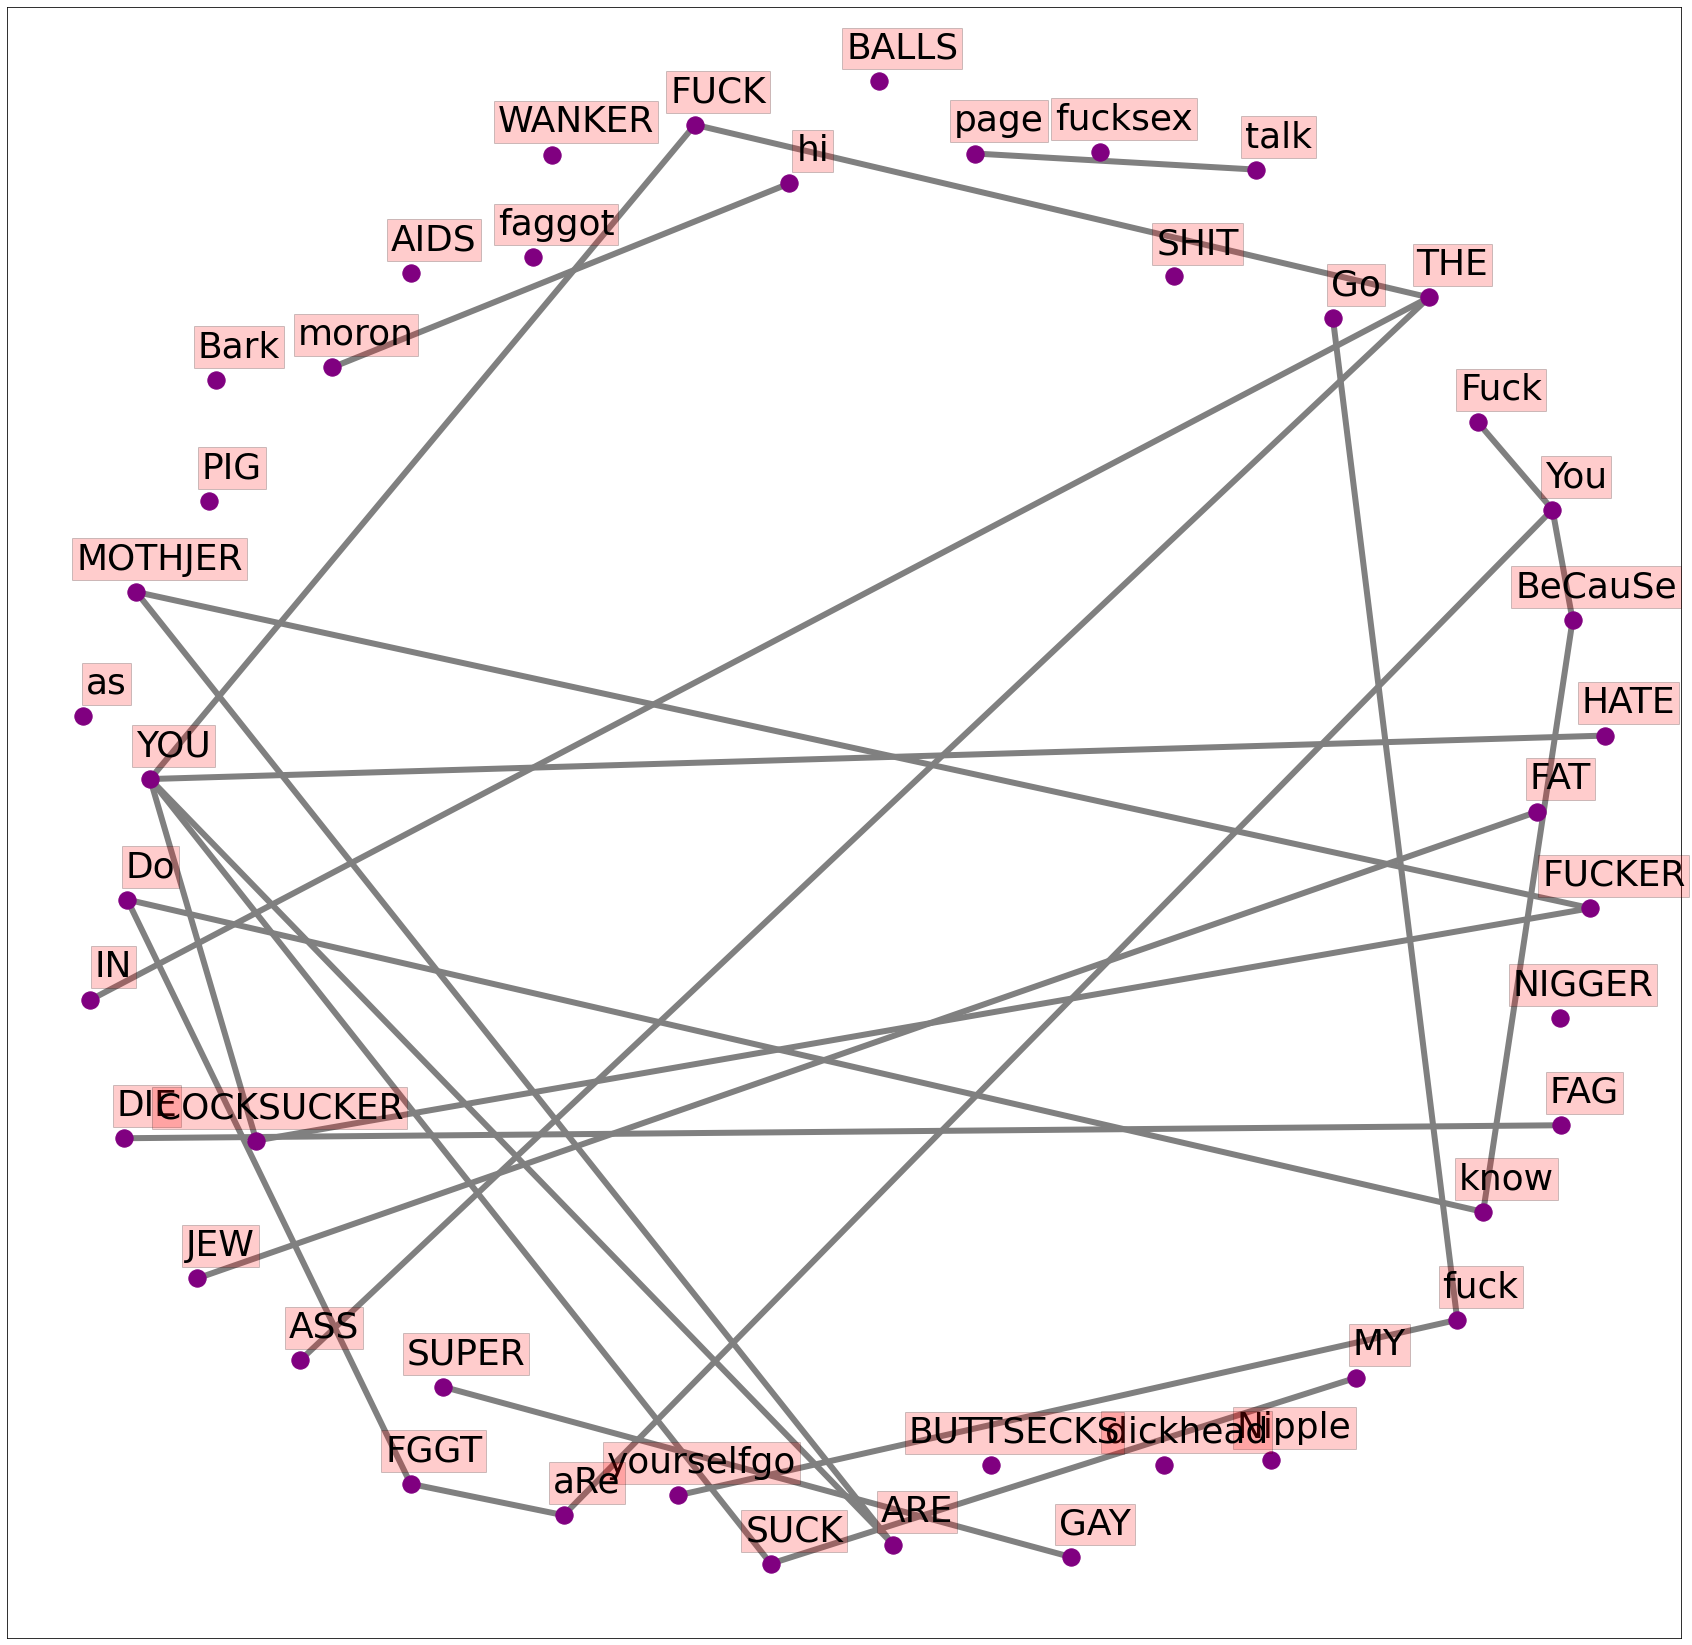

In [188]:
 
d_toxic = toxic_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_toxic.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

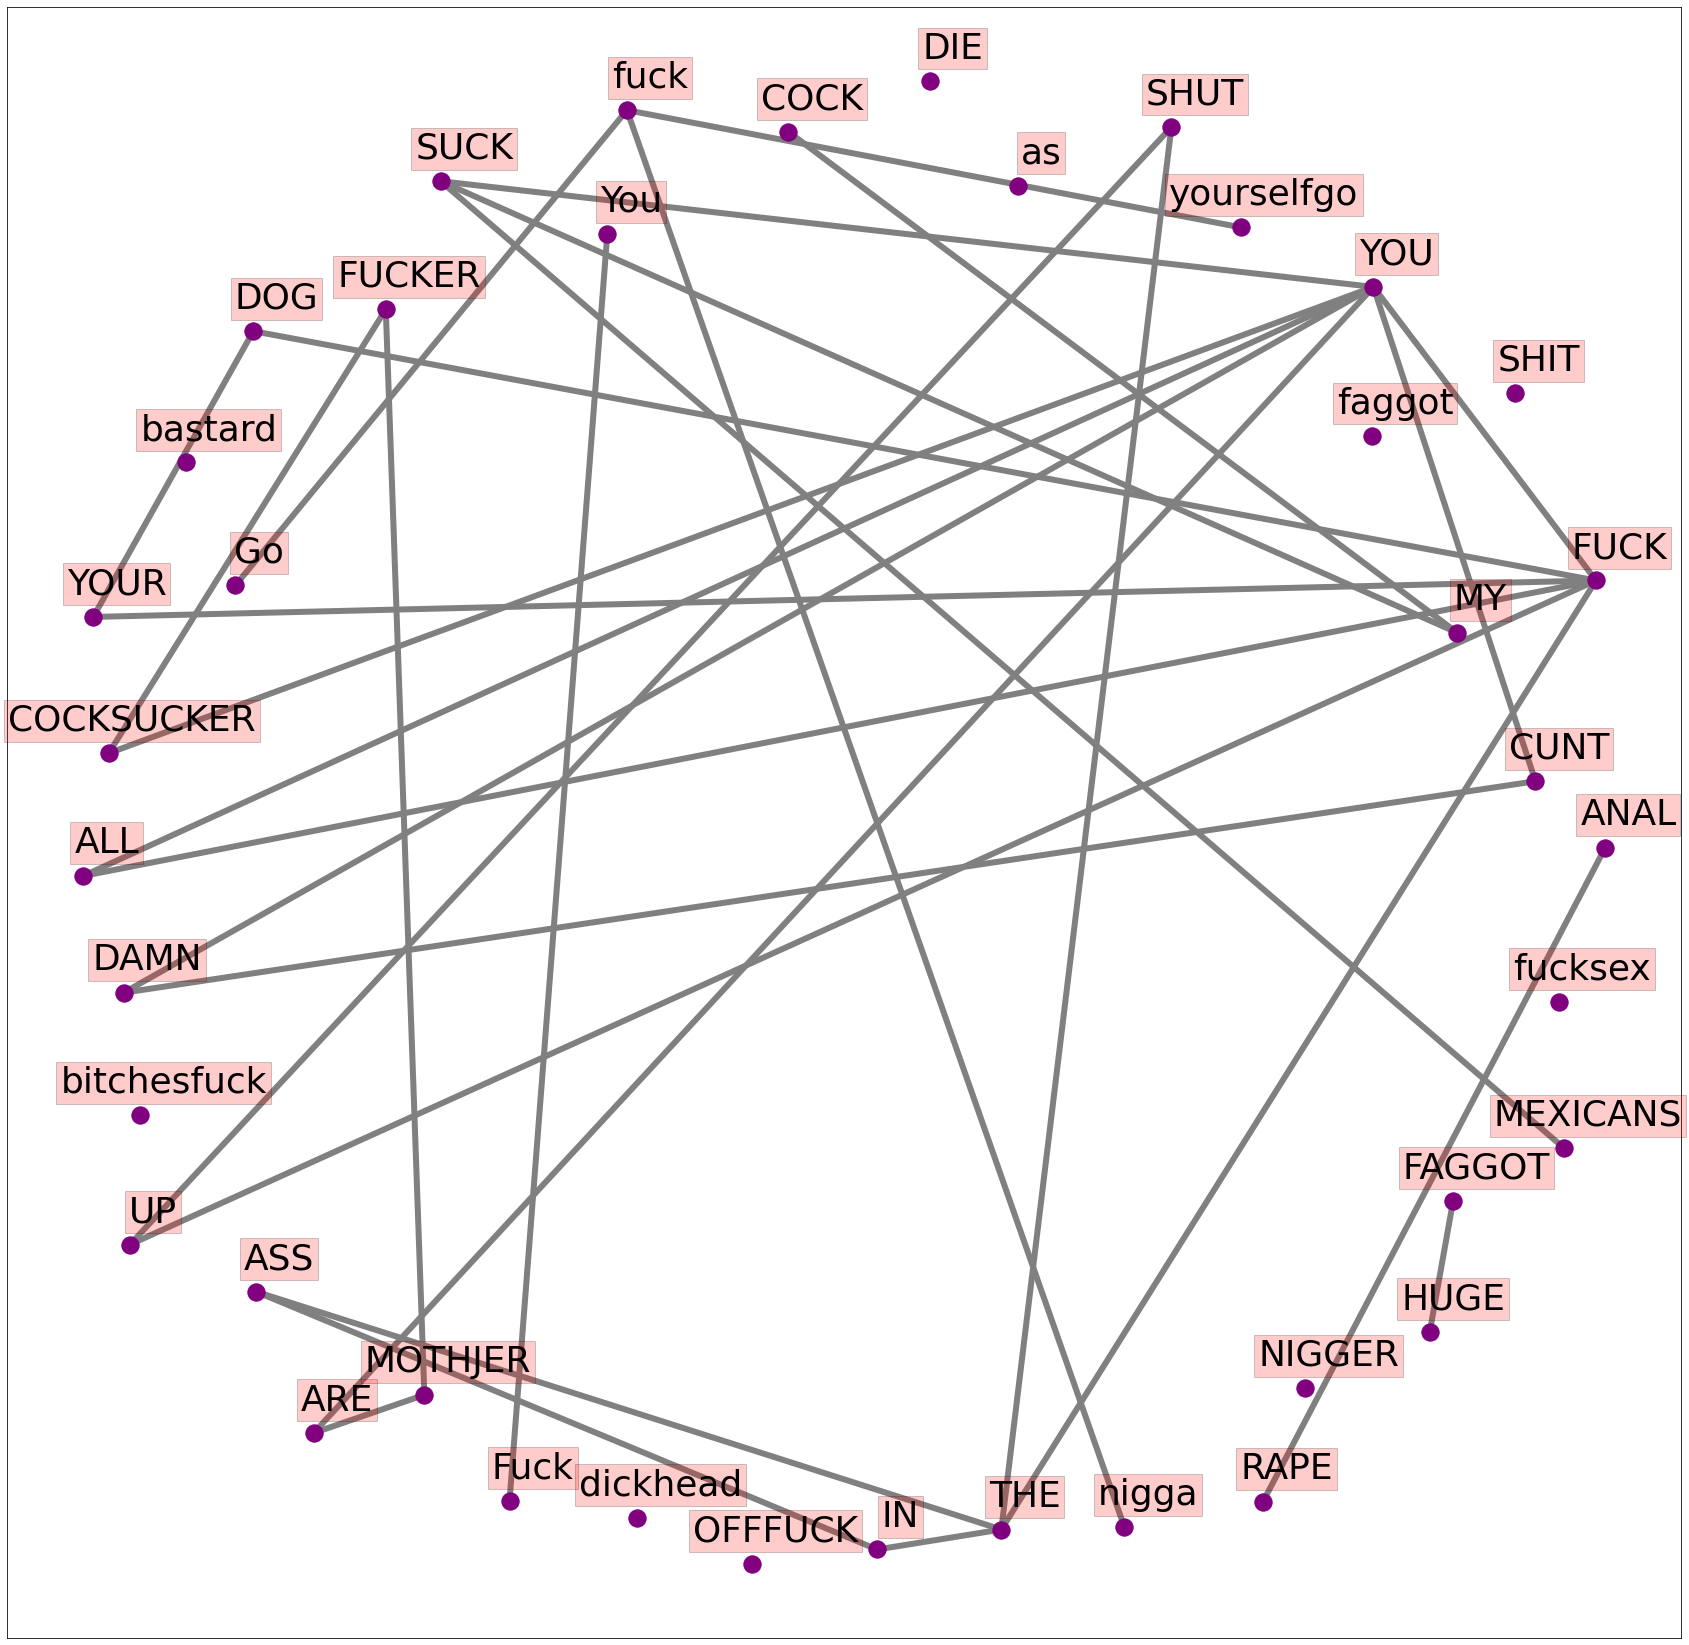

In [189]:
 
d_severe_toxic = severe_toxic_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_severe_toxic.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

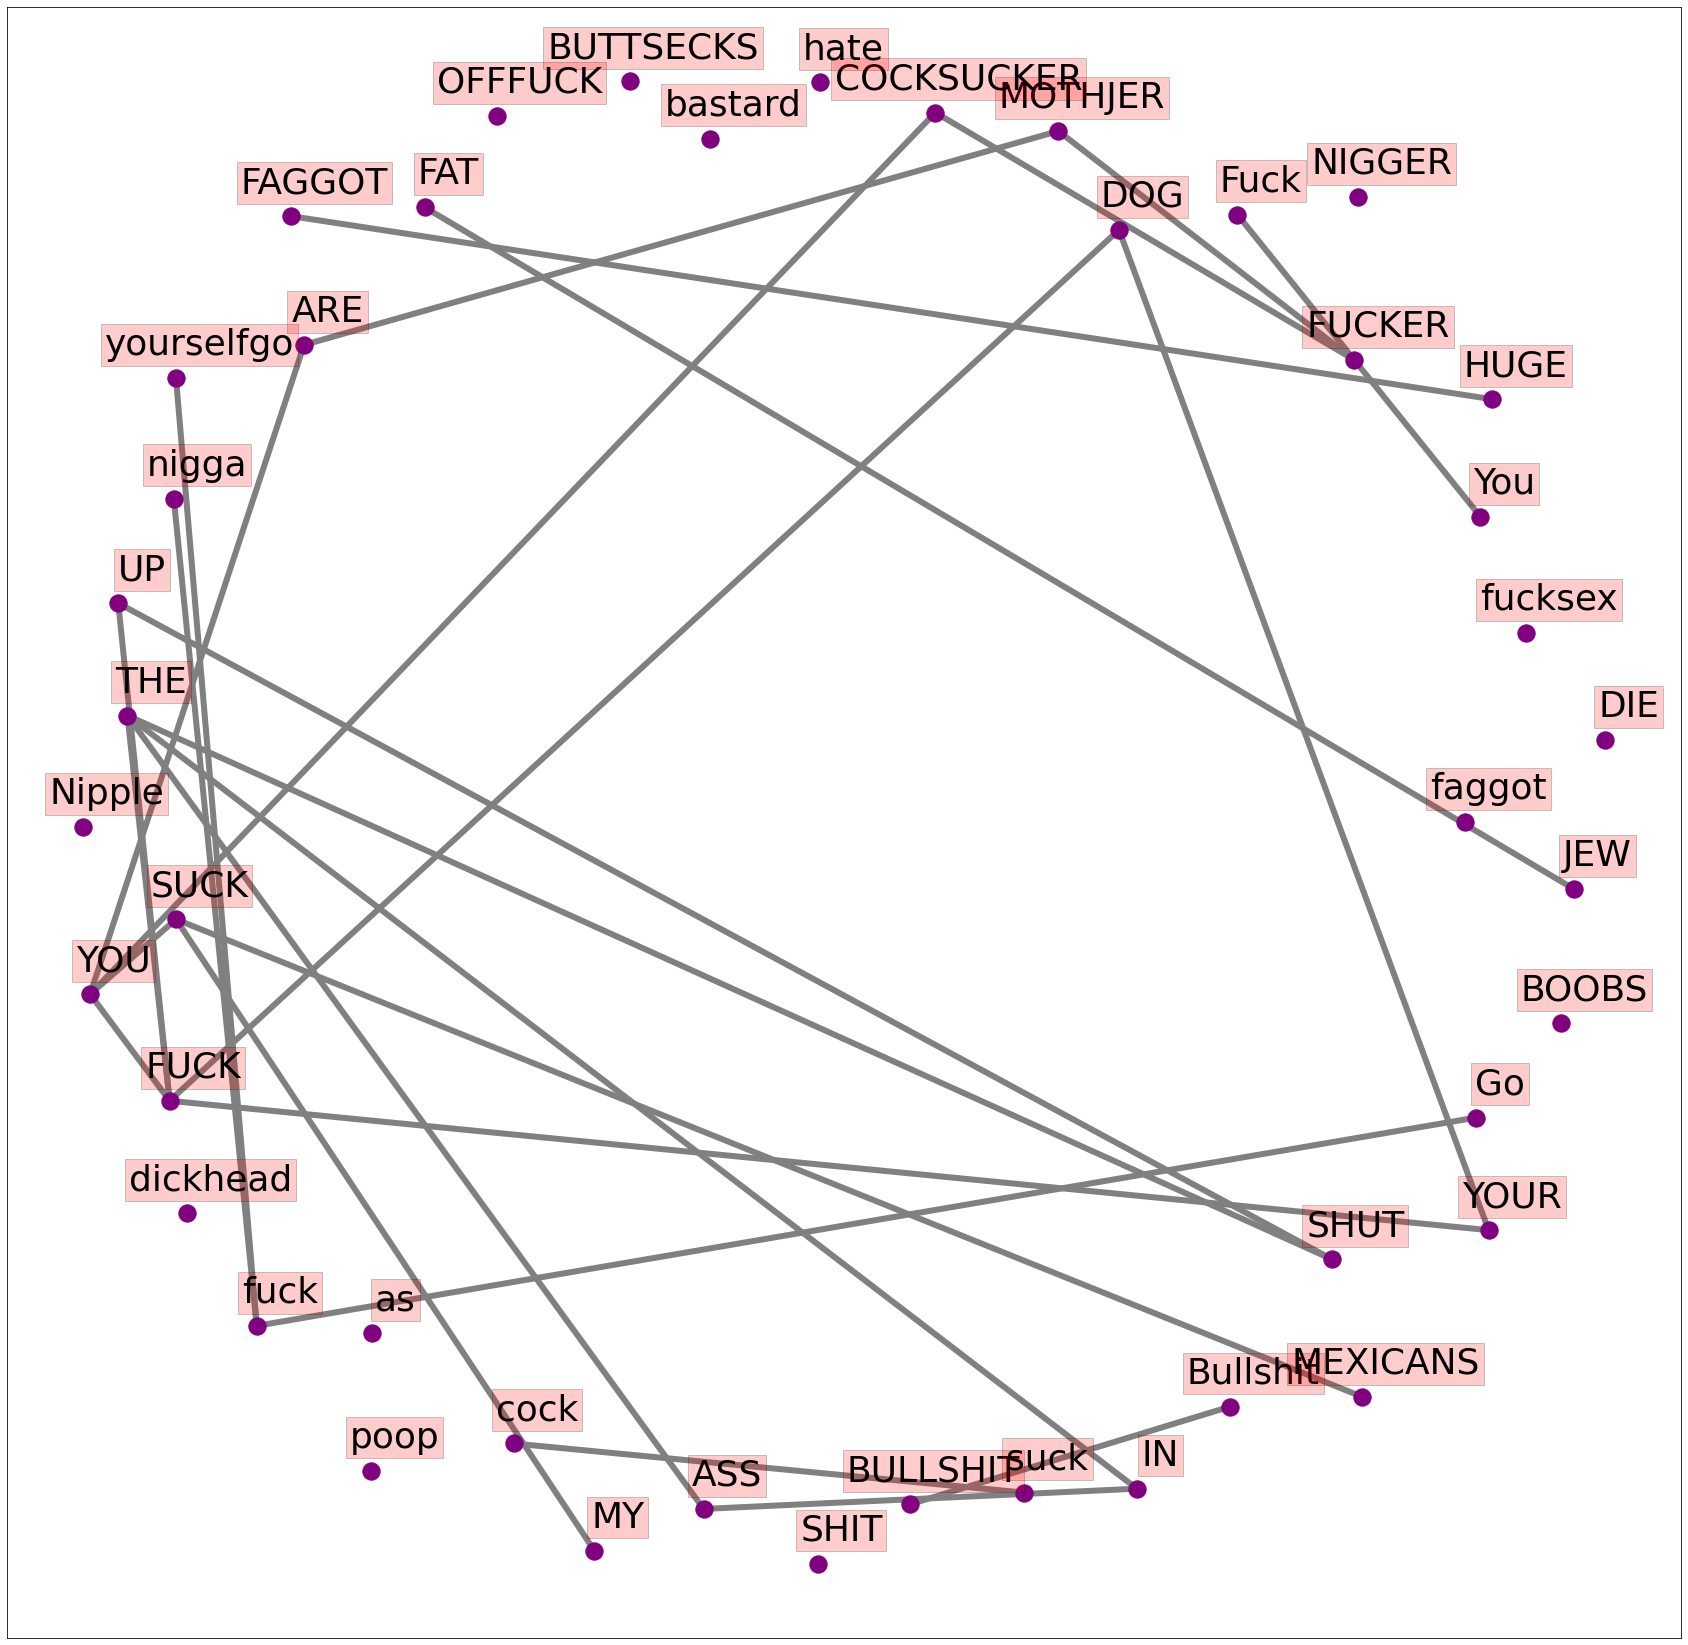

In [190]:
 
d_obscene = obscene_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_obscene.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

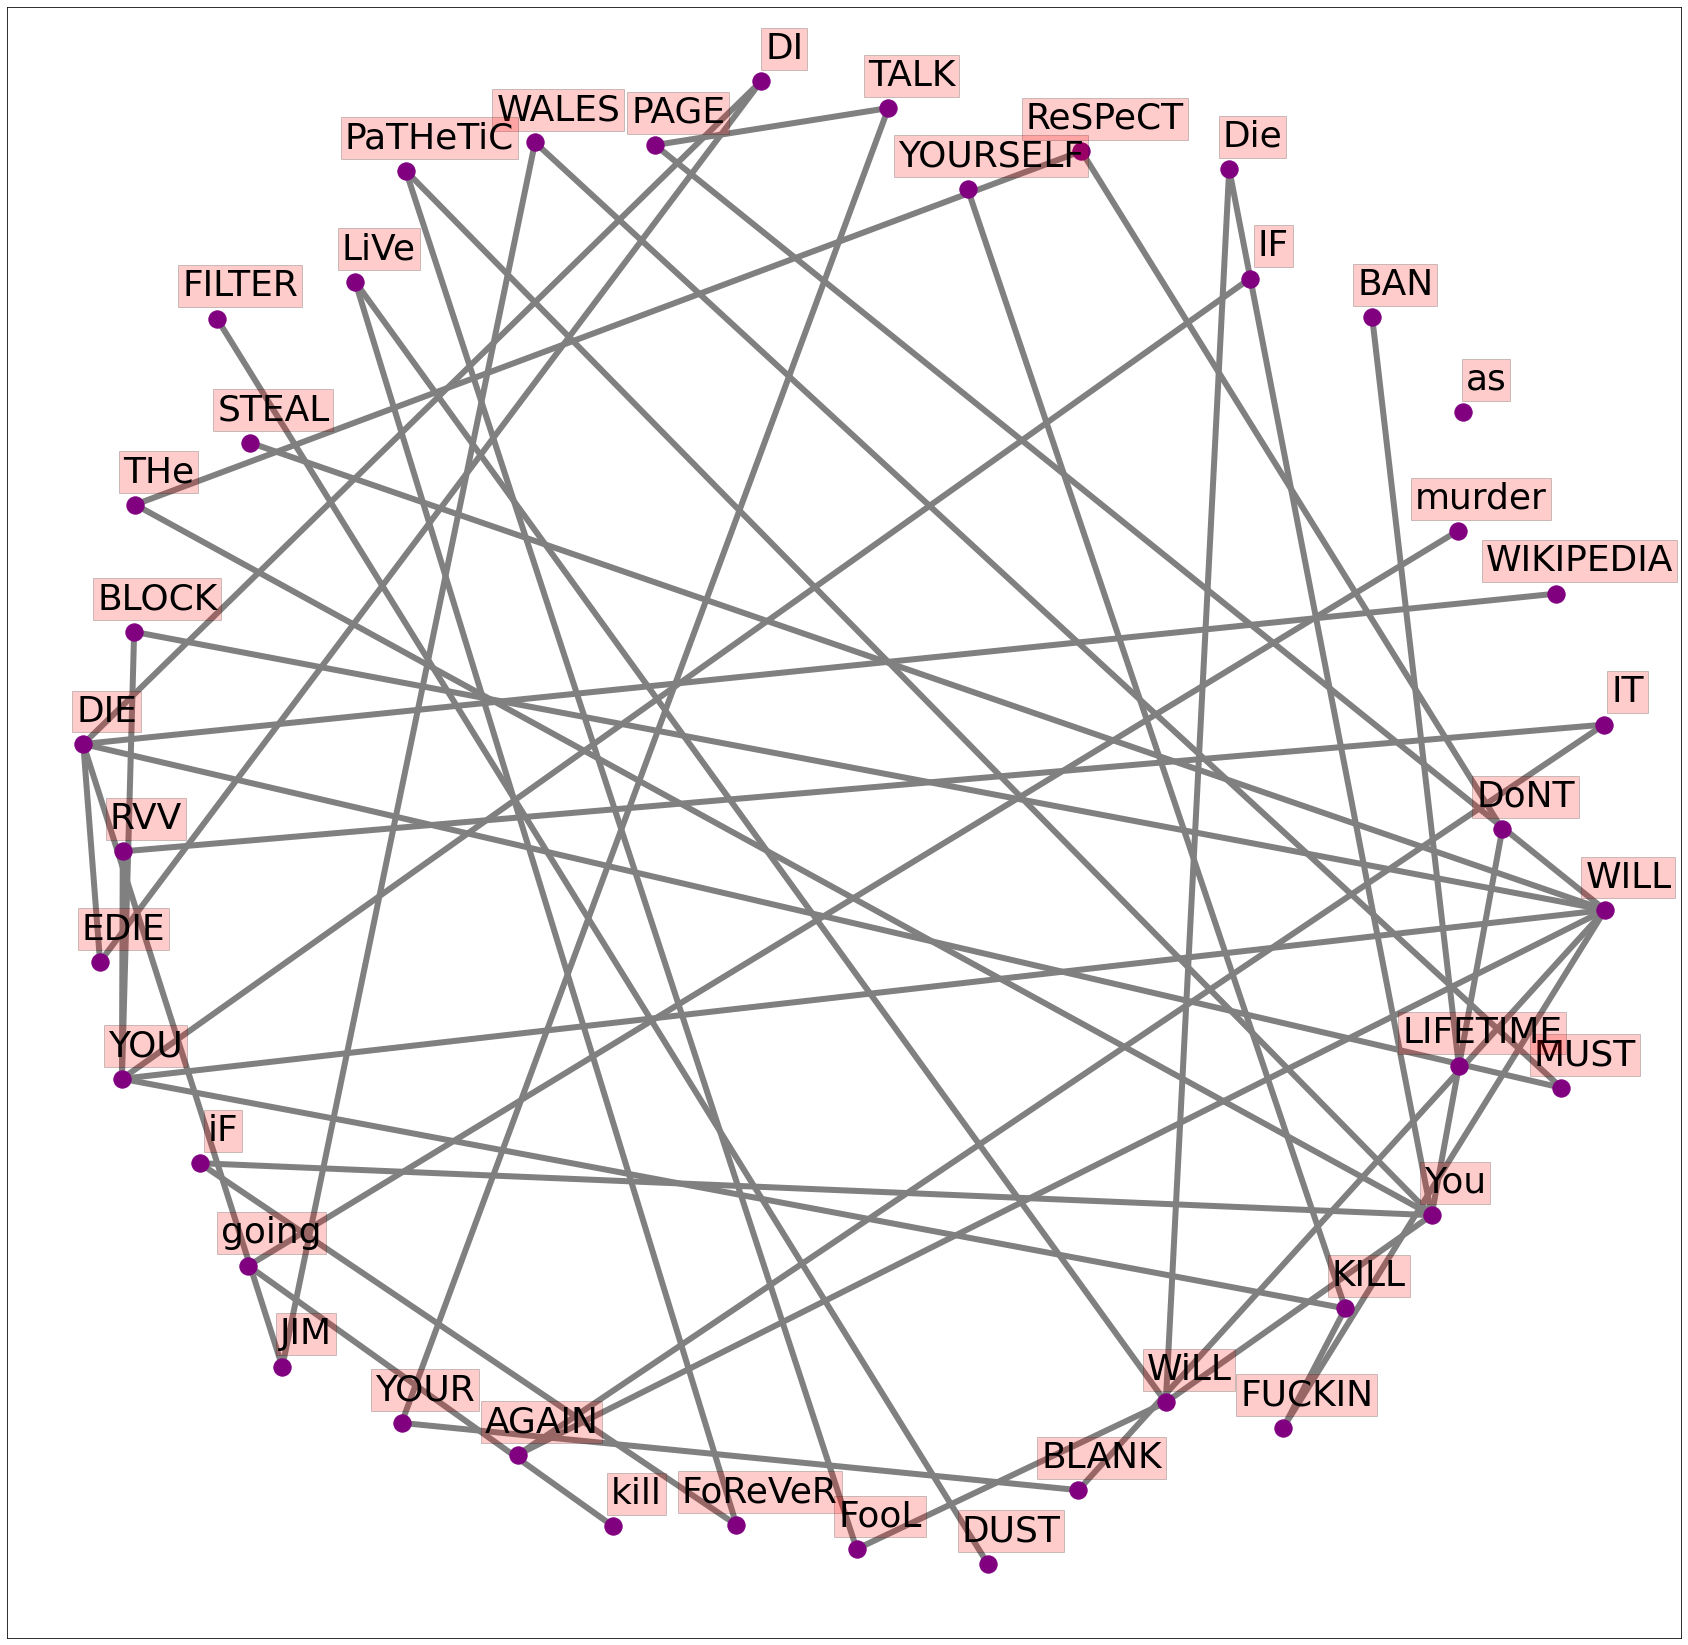

In [191]:
 
d_threat = threat_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_threat.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

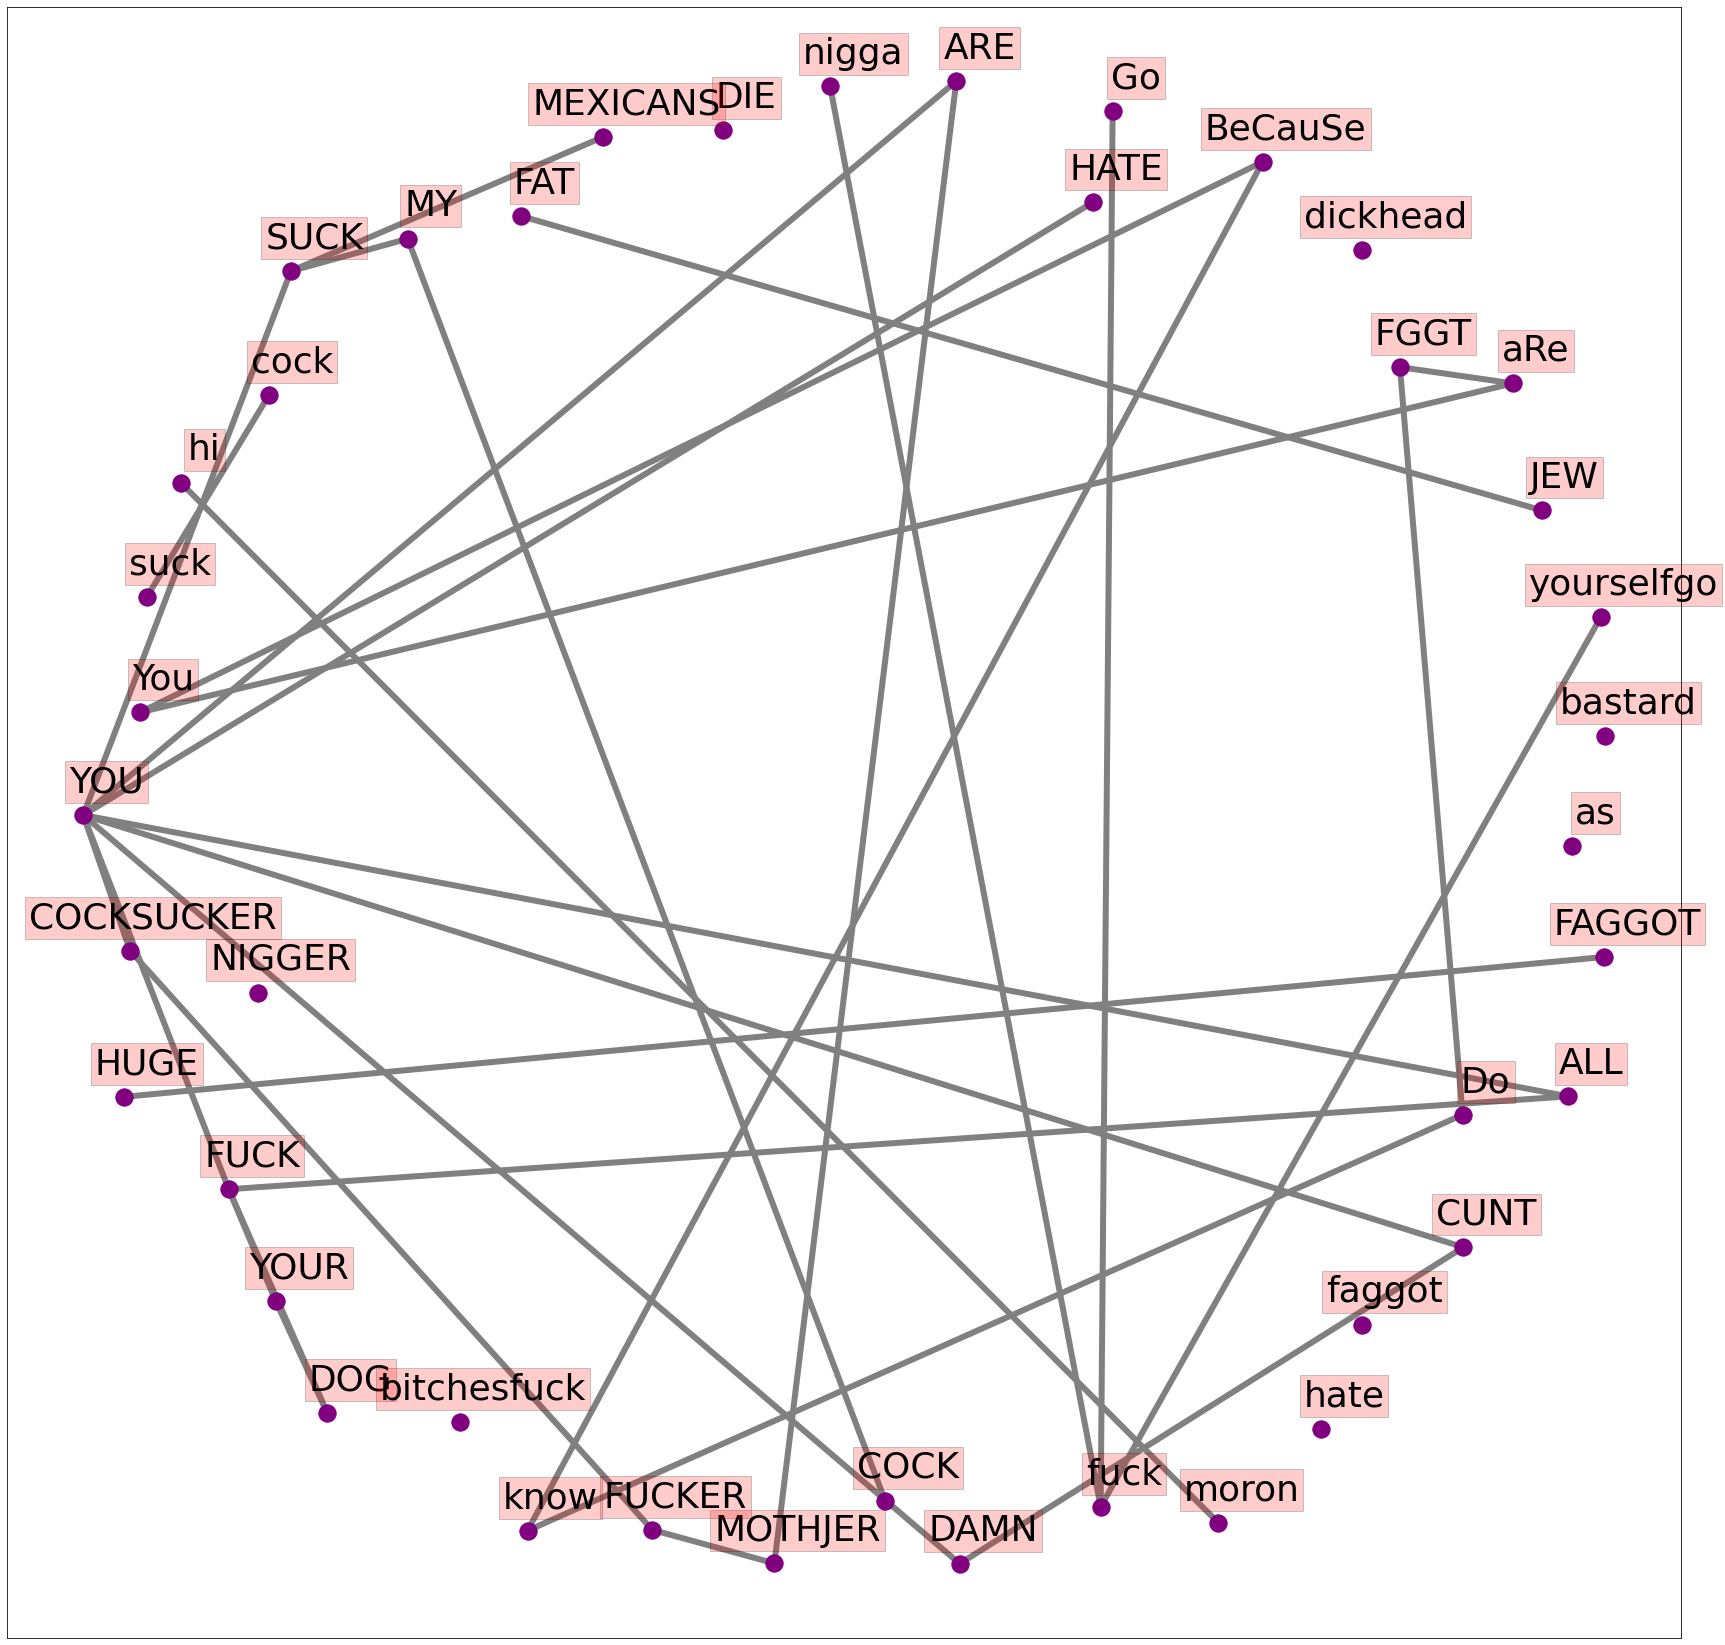

In [192]:
 
d_insult = insult_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_insult.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

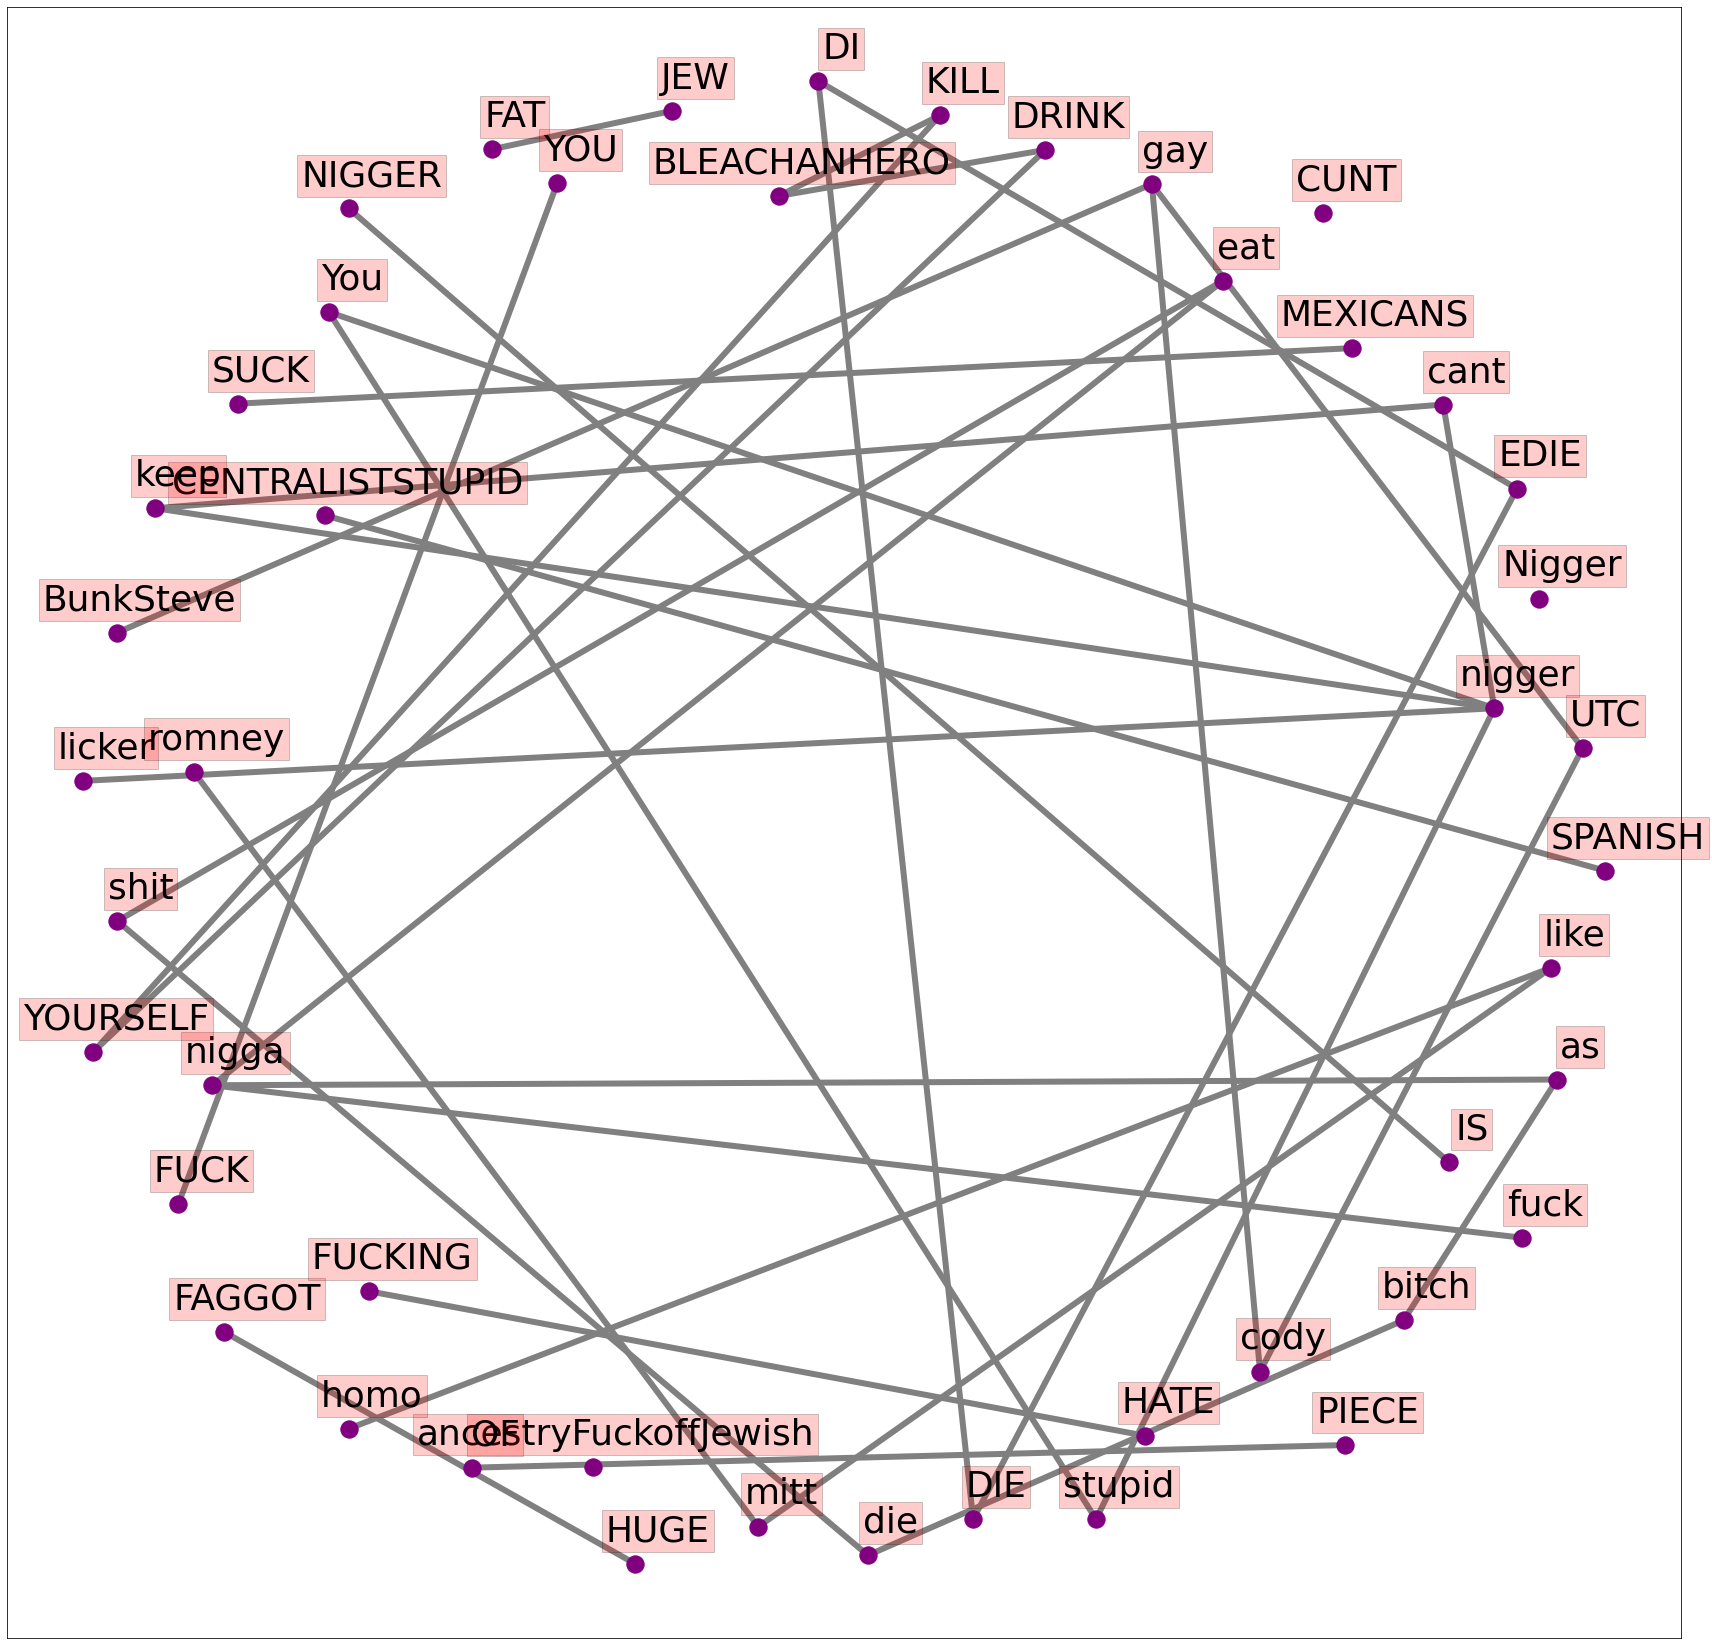

In [193]:
 
d_identity_hate = identity_hate_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_identity_hate.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

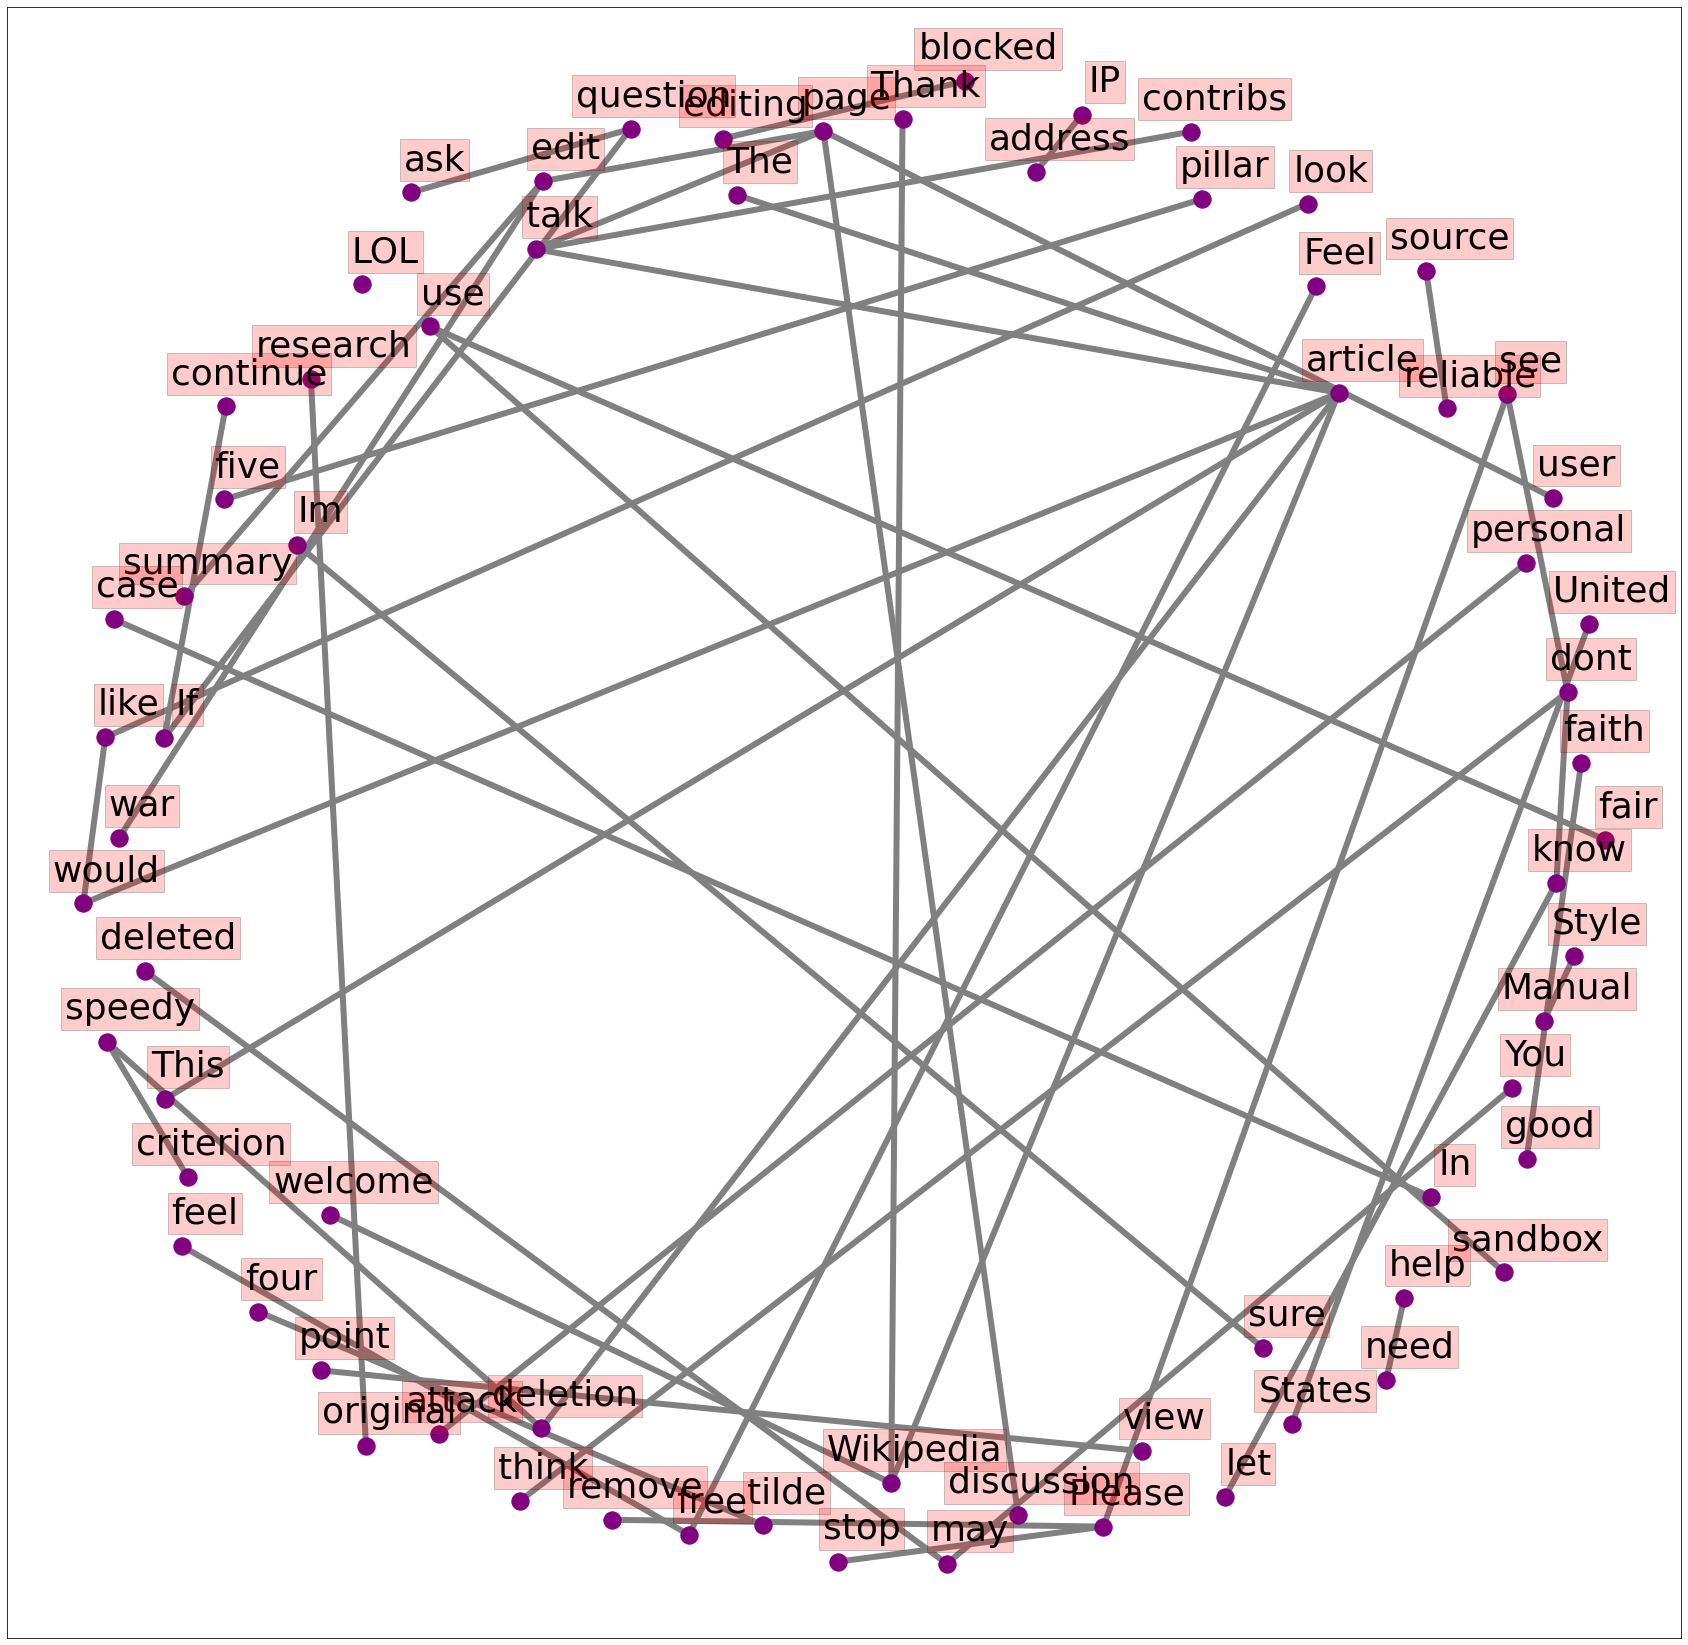

In [194]:
 
d_non_toxic = non_toxic_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_non_toxic.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()